In [1]:
import requests
from bs4 import BeautifulSoup as bs
import re
import string

In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
import nltk
#from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk import tokenize

In [4]:
iphone_reviews=[]

In [5]:
url1 = "https://www.snapdeal.com/product/apple-iphone-5c-16-gb/988871559/reviews?page="
url2 = "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"

In [6]:
for i in range(1,10):
  ip=[]  
  base_url = url1+str(i)+url2
  response = requests.get(base_url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  temp = soup.findAll("div",attrs={"class","user-review"})# Extracting the content under specific tags  
  for j in range(len(temp)):
    ip.append(temp[j].find("p").text)
  iphone_reviews=iphone_reviews+ip

In [7]:
iphone_reviews = list(set(iphone_reviews))

In [8]:
with open("ip_snapdeal.txt","w",encoding="utf-8") as snp:
    snp.write(str(iphone_reviews))

In [9]:
iphone_reviews

['got this at a great discount, the phone is worth it. my wife wanted to try an iphone and she is loving it now',
 'Worth in this price. Excellent features. Overall performance is Good',
 'Really happy with the product and service..always the best..:)',
 "Honestly speaking initially I was hesitated because of previous reviews about snapdeal. But those all reviews are fake and just to damage the reputation of snapdeal. I am truely satisfied by snapdeal's service. 100% satisfactory. Genuine product with honest service. So don't believe on rumours. I am going with five stars. Thanks snapdeal for wonderful shopping experience.",
 "D phone is good. IOS is d best OS.... Safe also. D phone looks great though it consists plastic body. Metal body looks good bt dt nt means plastic body looks cheap plastic may also b nice in looks. Its camera is superb. Battery also. Dere is only one problem nd dat is space... Bt I can't say dis is d phone's problem at all. I hv chosen d 8gb phone so it's my flaw

In [10]:
ip_rev_string = " ".join(iphone_reviews)

In [11]:
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)

In [12]:
ip_reviews_words = ip_rev_string.split(" ")

In [13]:
import pandas as pd

In [14]:
stopwords = pd.read_csv("E:/DataScience/Assignments/TextMining/stop.txt")

In [15]:
stopwords

,a
0,a's
1,able
2,about
3,above
4,according
...,...
565,yours
566,yourself
567,yourselves
568,z


In [16]:
temp = ["this","is","awsome","Data","Science"]
[i for i in temp if i not in "is"]

['this', 'awsome', 'Data', 'Science']

In [17]:
ip_reviews_words = [w for w in ip_reviews_words if not w in stopwords]

In [18]:
ip_reviews_words

['got',
 'this',
 'at',
 'great',
 'discount',
 'the',
 'phone',
 'is',
 'worth',
 'it',
 'my',
 'wife',
 'wanted',
 'to',
 'try',
 'an',
 'iphone',
 'and',
 'she',
 'is',
 'loving',
 'it',
 'now',
 'worth',
 'in',
 'this',
 'price',
 'excellent',
 'features',
 'overall',
 'performance',
 'is',
 'good',
 'really',
 'happy',
 'with',
 'the',
 'product',
 'and',
 'service',
 'always',
 'the',
 'best',
 'honestly',
 'speaking',
 'initially',
 'i',
 'was',
 'hesitated',
 'because',
 'of',
 'previous',
 'reviews',
 'about',
 'snapdeal',
 'but',
 'those',
 'all',
 'reviews',
 'are',
 'fake',
 'and',
 'just',
 'to',
 'damage',
 'the',
 'reputation',
 'of',
 'snapdeal',
 'i',
 'am',
 'truely',
 'satisfied',
 'by',
 'snapdeal',
 's',
 'service',
 'satisfactory',
 'genuine',
 'product',
 'with',
 'honest',
 'service',
 'so',
 'don',
 't',
 'believe',
 'on',
 'rumours',
 'i',
 'am',
 'going',
 'with',
 'five',
 'stars',
 'thanks',
 'snapdeal',
 'for',
 'wonderful',
 'shopping',
 'experience',
 'd

In [19]:
ip_rev_string = " ".join(ip_reviews_words)

In [20]:
ip_rev_string

'got this at great discount the phone is worth it my wife wanted to try an iphone and she is loving it now worth in this price excellent features overall performance is good really happy with the product and service always the best honestly speaking initially i was hesitated because of previous reviews about snapdeal but those all reviews are fake and just to damage the reputation of snapdeal i am truely satisfied by snapdeal s service satisfactory genuine product with honest service so don t believe on rumours i am going with five stars thanks snapdeal for wonderful shopping experience d phone is good ios is d best os safe also d phone looks great though it consists plastic body metal body looks good bt dt nt means plastic body looks cheap plastic may also b nice in looks its camera is superb battery also dere is only one problem nd dat is space bt i can t say dis is d phone s problem at all i hv chosen d gb phone so it s my flaw but in word i just can say it is d best phone in dis pr

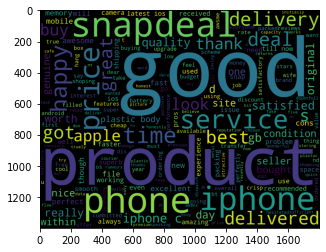

In [21]:
wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_rev_string)

plt.imshow(wordcloud_ip)

In [22]:
positive_words=pd.read_csv("E:/DataScience/Assignments/TextMining/positive-words.txt",error_bad_lines=False)

b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 2\n'


In [23]:
 positive_words

,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Positive
2,;
3,; This file contains a list of POSITIVE opinio...
4,;
...,...
2026,youthful
2027,zeal
2028,zenith
2029,zest


In [24]:
pos = positive_words.values

In [25]:
pos

array([['; '],
       ['; Opinion Lexicon: Positive'],
       [';'],
       ...,
       ['zenith'],
       ['zest'],
       ['zippy']], dtype=object)

In [26]:
pos = pd.DataFrame(pos, columns=['text'] )

In [27]:
pos

,text
0,;
1,; Opinion Lexicon: Positive
2,;
3,; This file contains a list of POSITIVE opinio...
4,;
...,...
2026,youthful
2027,zeal
2028,zenith
2029,zest


In [28]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)


In [29]:
pos['text'] = pos.text.apply(clean)
pos.text

0                                                        
1                                opinion lexicon positive
2                                                        
3        this file contains a list of positive opinion...
4                                                        
                              ...                        
2026                                             youthful
2027                                                 zeal
2028                                               zenith
2029                                                 zest
2030                                                zippy
Name: text, Length: 2031, dtype: object

In [30]:
post = pos.values

In [31]:
ip_pos = " ".join ([w for w in ip_reviews_words if w in post])

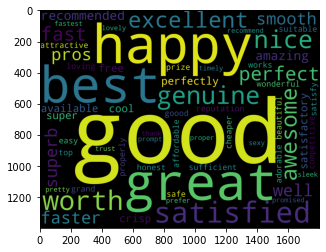

In [32]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_pos)

plt.imshow(wordcloud_pos)

In [33]:
negative_words=pd.read_csv("E:/DataScience/Assignments/TextMining/negative-words.txt",error_bad_lines=False, encoding='latin')

b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 2\n'


In [34]:
negative_words

,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Negative
2,;
3,; This file contains a list of NEGATIVE opinio...
4,;
...,...
4803,zaps
4804,zealot
4805,zealous
4806,zealously


In [35]:
neg = negative_words.values

In [36]:
neg = pd.DataFrame(neg, columns=['text'])

In [37]:
neg

,text
0,;
1,; Opinion Lexicon: Negative
2,;
3,; This file contains a list of NEGATIVE opinio...
4,;
...,...
4803,zaps
4804,zealot
4805,zealous
4806,zealously


In [38]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [39]:
neg['text'] = neg.text.apply(clean)
neg.text

0                                                        
1                                opinion lexicon negative
2                                                        
3        this file contains a list of negative opinion...
4                                                        
                              ...                        
4803                                                 zaps
4804                                               zealot
4805                                              zealous
4806                                            zealously
4807                                               zombie
Name: text, Length: 4808, dtype: object

In [40]:
negt = neg.values

In [41]:
ip_neg = " ".join ([w for w in ip_reviews_words if w in negt])

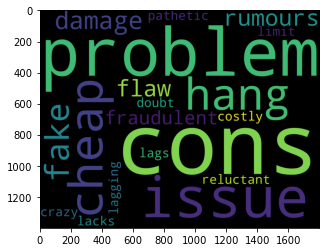

In [42]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg)

plt.imshow(wordcloud_neg)

In [43]:
iphone_unique_words = list(set(" ".join(iphone_reviews).split(" ")))

In [44]:
iphone_unique_words

['',
 'beatifully',
 'on',
 'APPLE',
 '5C',
 'Quality',
 'time.',
 'made',
 'model',
 '\xa0read',
 'version.\nVery',
 'Recommended*****',
 '24',
 'members.',
 'above',
 'sealed',
 'its',
 'absolutly',
 'Deal.',
 'prize\n2.',
 'filled',
 'delivery.',
 '1000rs',
 'offer',
 'promised',
 'years,',
 'while',
 'buying.',
 'snapdeal',
 'bluetooth',
 'iphone,',
 ':0)',
 'lags,',
 'budget.',
 'are:',
 'ordering....',
 'superb',
 'true',
 'loving',
 'class',
 '2',
 'services.',
 'as',
 'need.',
 'be',
 'one.',
 'perfectly.',
 'pathetic.',
 'capacity',
 'D',
 'day',
 'got',
 'up!!!',
 'than',
 'Do',
 'seconds',
 'though',
 'honest',
 'Thanx',
 'Samsung',
 '20K',
 'Within',
 '1',
 'premium',
 'care',
 'hahahaha',
 'You',
 'packing',
 'committed;',
 'happy.also',
 'Features',
 'need',
 'leaving',
 'price....At',
 'files',
 '!!',
 'They',
 'Everyone',
 'she',
 'since',
 'that.',
 'Low',
 'your',
 'DELIVERY',
 'already',
 'warranty',
 'OS....',
 'oparating',
 'properly',
 'sufficient',
 'sd',
 'Easy'

In [45]:
iphone_reviews

['got this at a great discount, the phone is worth it. my wife wanted to try an iphone and she is loving it now',
 'Worth in this price. Excellent features. Overall performance is Good',
 'Really happy with the product and service..always the best..:)',
 "Honestly speaking initially I was hesitated because of previous reviews about snapdeal. But those all reviews are fake and just to damage the reputation of snapdeal. I am truely satisfied by snapdeal's service. 100% satisfactory. Genuine product with honest service. So don't believe on rumours. I am going with five stars. Thanks snapdeal for wonderful shopping experience.",
 "D phone is good. IOS is d best OS.... Safe also. D phone looks great though it consists plastic body. Metal body looks good bt dt nt means plastic body looks cheap plastic may also b nice in looks. Its camera is superb. Battery also. Dere is only one problem nd dat is space... Bt I can't say dis is d phone's problem at all. I hv chosen d 8gb phone so it's my flaw

In [46]:
reviews = pd.DataFrame(iphone_reviews, columns=['text'])

In [47]:
reviews

,text
0,"got this at a great discount, the phone is wor..."
1,Worth in this price. Excellent features. Overa...
2,Really happy with the product and service..alw...
3,Honestly speaking initially I was hesitated be...
4,D phone is good. IOS is d best OS.... Safe als...
...,...
82,Amazing product at this price....At first I wa...
83,Quality product from snapdeal. Delivery was on...
84,Good product. Worth buying. Nice phone. Timely...
85,Good Price. Great Seller. Genuine Product. Fas...


In [48]:
text = reviews.text

In [49]:
text

0     got this at a great discount, the phone is wor...
1     Worth in this price. Excellent features. Overa...
2     Really happy with the product and service..alw...
3     Honestly speaking initially I was hesitated be...
4     D phone is good. IOS is d best OS.... Safe als...
                            ...                        
82    Amazing product at this price....At first I wa...
83    Quality product from snapdeal. Delivery was on...
84    Good product. Worth buying. Nice phone. Timely...
85    Good Price. Great Seller. Genuine Product. Fas...
86    I got my iPhone 5c white colour in good condit...
Name: text, Length: 87, dtype: object

In [50]:
import spacy

In [51]:
nlp = spacy.load('en')

In [52]:
one_block = text[10]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [53]:
one_block


'It is a nice phone by Apple. Camera is good and phone works perfectly. It is worth a Shot'

In [54]:
for token in doc_block[0:50]:
    print(token, token.pos_)

It PRON
is AUX
a DET
nice ADJ
phone NOUN
by ADP
Apple PROPN
. PUNCT
Camera NOUN
is AUX
good ADJ
and CCONJ
phone NOUN
works NOUN
perfectly ADV
. PUNCT
It PRON
is AUX
worth ADJ
a DET
Shot NOUN


In [55]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[1:25])

['Camera', 'phone', 'works', 'Shot']


In [56]:
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:30]

,word,count
0,phone,2
1,camera,1
2,works,1
3,shot,1


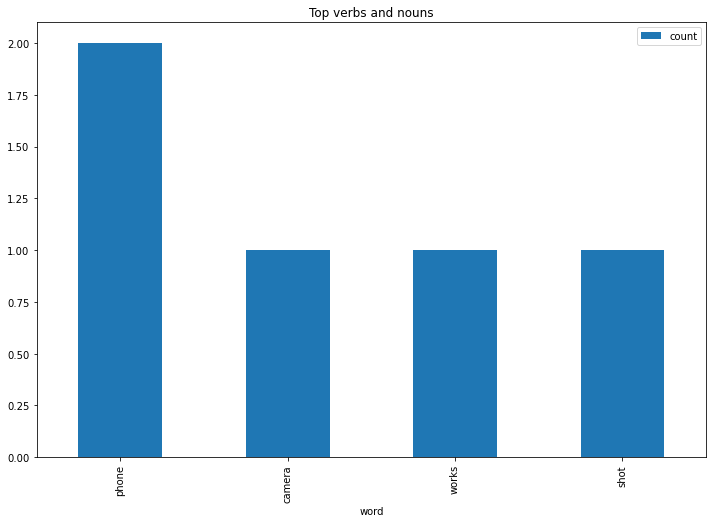

In [57]:
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [58]:
sentences = tokenize.sent_tokenize(" ".join(text))
sentences[5:15]

["I am truely satisfied by snapdeal's service.",
 '100% satisfactory.',
 'Genuine product with honest service.',
 "So don't believe on rumours.",
 'I am going with five stars.',
 'Thanks snapdeal for wonderful shopping experience.',
 'D phone is good.',
 'IOS is d best OS....',
 'Safe also.',
 'D phone looks great though it consists plastic body.']

In [59]:
df = pd.DataFrame(sentences, columns=['sentence'])
df

,sentence
0,"got this at a great discount, the phone is wor..."
1,my wife wanted to try an iphone and she is lov...
2,Excellent features.
3,Overall performance is Good Really happy with ...
4,But those all reviews are fake and just to dam...
...,...
121,Timely delivery by snap deal Good Price.
122,Great Seller.
123,Genuine Product.
124,Fast Shipping.


In [60]:
afinn = pd.read_csv('E:/DataScience/Assignments/TextMining/Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [61]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [62]:
nlp = spacy.load('en')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [63]:
calculate_sentiment(text = 'awesome')

4

In [64]:
df['sentiment_value'] = df['sentence'].apply(calculate_sentiment)

In [65]:
df['word_count'] = df['sentence'].str.split().apply(len)
df['word_count'].head(10)

0    11
1    17
2     2
3    25
4    14
5     7
6     2
7     5
8     5
9     6
Name: word_count, dtype: int64

In [66]:
df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
85,Overall perfect I am really happy with product...,10,14
71,i would recommended Snapdeal service my near &...,11,30
62,Price and delivery service are good I received...,11,68
95,Awsme delivry on time and product recievd in g...,12,39
82,"good as like iphone, apple , and snapdeal ser...",12,19
78,Very happy with the deal.. dream come true Ver...,13,35
60,Worth buying from snap deal due to its competi...,14,51
35,It is worth a Shot Pros : Picture quality is a...,14,43
110,Very good one perfectly the original one with ...,15,20
91,Very good product and delivered in time as co...,19,42


In [67]:
df['sentiment_value'].describe()

count    126.000000
mean       2.960317
std        4.122913
min       -6.000000
25%        0.000000
50%        2.000000
75%        5.000000
max       19.000000
Name: sentiment_value, dtype: float64

In [68]:
df[df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
4,But those all reviews are fake and just to dam...,-6,14
6,100% satisfactory.,0,2
8,So don't believe on rumours.,0,5
9,I am going with five stars.,0,6
17,Battery also.,0,2


In [69]:
df[df['sentiment_value']>=20].head()

,sentence,sentiment_value,word_count


In [70]:
df['index']=range(0,len(df))

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

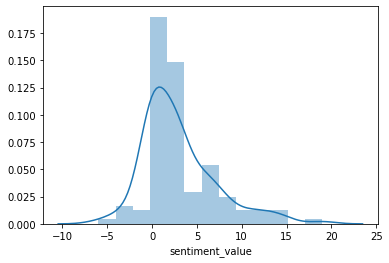

In [72]:
sns.distplot(df['sentiment_value'])

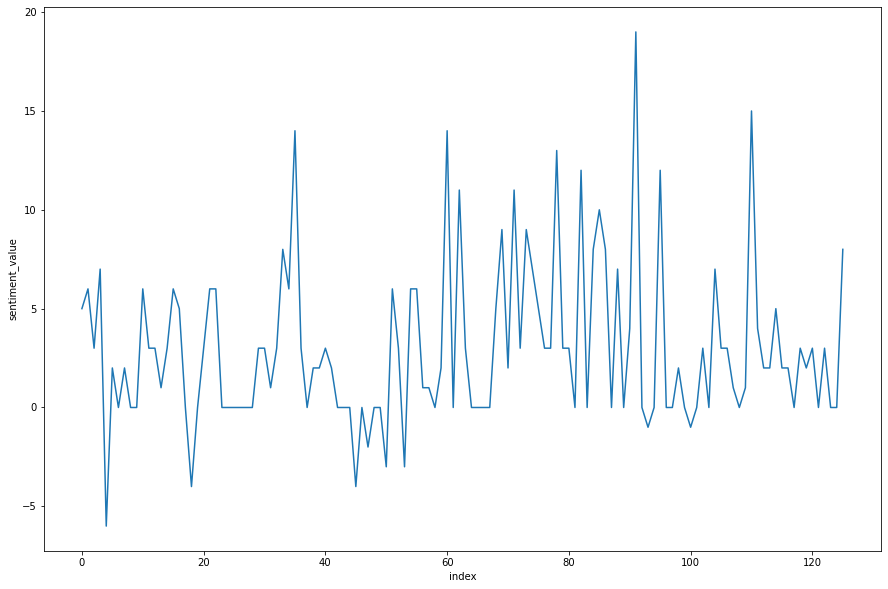

In [73]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=df)

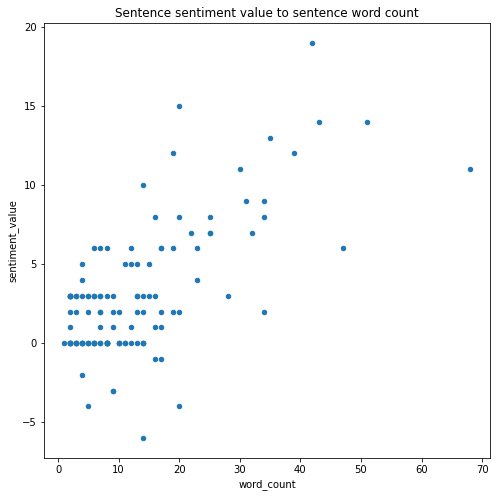

In [74]:
df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')